In [1]:
# Import Libraries
import numpy as np # package for scientific computing
import pandas as pd # package for data manipulation
import os # package for communicating with operating system
import statsmodels.formula.api as smf # package for 
#statistical models i.e. OLS
import scipy.stats as st
import matplotlib.pyplot as plt
import yfinance as yf

#### Question 1)

In [2]:
# Load the data
data = pd.read_csv('hw2_w24_data.csv',parse_dates = True, index_col = 0)
data.head()

,gap_diff,inf_diff,s_change
2003-12-16,-1.466332,-0.036955,-0.029570
2003-12-18,-0.813845,-0.036955,-0.008251
2003-12-26,-0.807195,-0.264883,-0.000957
2004-01-16,-0.500673,-0.264883,0.003785
2004-01-17,-0.460464,-0.264883,0.002907


In [3]:
#(a) #Adding a new column named ''forecast'' to the dataframe and 
#initializing all values to zero.
data['forecast'] = 0.0

# Start the expanding window at row 120
#Initiating a loop starting from the 121st observation (index 120)
#to the end of the dataset.
#OLS regression model using the expanding window approach. 
   #The model is based on the formula s_change ~ inf_diff + gap_diff, and 
    #it is fitted using data from the beginning of the dataset up to 
    #the current row (i).
for i in range(120, len(data)):
    # Use the expanding window for model fitting
    forecaster = smf.ols(formula='s_change ~ gap_diff + inf_diff', data=data[:i]).fit()
    
    # Forecast for the next observation and storing the 
    #forecasted value in 
    #the 'forecast' column at the current row (i). 
    data.loc[data.index[i], 'forecast'] = forecaster.predict(data.iloc[i:i+1]).values

In [4]:
data['forecast']

2003-12-16    0.000000
2003-12-18    0.000000
2003-12-26    0.000000
2004-01-16    0.000000
2004-01-17    0.000000
                ...   
2023-11-16   -0.001579
2023-11-17   -0.001804
2023-11-25    0.000192
2023-12-16    0.000292
2023-12-26    0.001098
Name: forecast, Length: 717, dtype: float64

In [5]:
print(forecaster.summary())

                            OLS Regression Results                            
Dep. Variable:               s_change   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     5.766
Date:                Thu, 08 Feb 2024   Prob (F-statistic):            0.00328
Time:                        20:55:52   Log-Likelihood:                 1927.9
No. Observations:                 716   AIC:                            -3850.
Df Residuals:                     713   BIC:                            -3836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.001     -0.961      0.3

In [6]:
data=data.iloc[120:].dropna()
data=data.copy()
#Selecting rows from index 120 to the end of the dataframe,
#effectively removing the first 120 rows of the dataframe.
#with.copy() I have a dataframe with only the part containing 
#my prediction and not affecting the original DataFrame.
data

,gap_diff,inf_diff,s_change,forecast
2007-04-18,-2.396485,0.548478,-0.003235,-0.004918
2007-04-25,-2.365108,0.844255,-0.001581,-0.003935
2007-05-16,-2.934149,0.844255,0.008433,-0.004886
2007-05-18,-2.213818,0.844255,-0.000149,-0.003300
2007-05-26,-2.185352,0.663404,0.005490,-0.003741
...,...,...,...,...
2023-11-16,1.564830,-0.620009,-0.027016,-0.001579
2023-11-17,0.643254,-0.620009,-0.004896,-0.001804
2023-11-25,0.636683,0.357036,-0.004701,0.000192
2023-12-16,1.330083,0.357036,0.003162,0.000292


In [6]:
# (b) Creating a new column 'signal' in the dataframe. 
#The values in this column are determined based
#on the sign of the linear forecasts ('s_change_fitted').
#If the forecast is greater than or equal to 0, the signal is set to 1;
#otherwise, it is set to -1. 
#This line essentially generates buy (1) and sell (-1) signals.

data['signal']= np.where(data['forecast']>= 0,1,-1)

In [7]:
#Calculating the cumulative strategy returns based on the generated signals.
#It uses the cumulative sum of the product of the 'signal' column 
#and the actual returns ('s_change').
#The result is exponentiated to calculate the cumulative returns and 
#then multiplied by 100 to return as a %
data['daily_return']=np.exp((data['signal']*data['s_change']))
data['strategy_return']=(np.exp((data['signal']*data['s_change']).cumsum())-1)*100



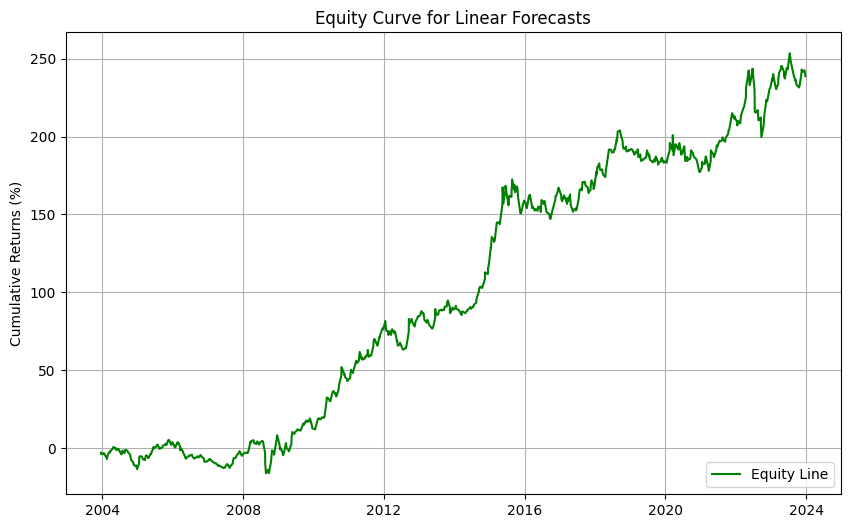

In [8]:
# Plotting the equity curve
plt.figure(figsize=(10, 6))
plt.plot(data['strategy_return'], color ='g')
plt.ylabel("Cumulative Returns (%)")
plt.title("Equity Curve for Linear Forecasts")
plt.legend(["Equity Line"], loc = 'lower right')
plt.grid()
plt.show()

#### Question 2)

In [9]:
#Download the data on S&P 500 from Yahoo Finance
sp500 =yf.download('^GSPC', start = data.index[0], end =data.index[-1], interval='1d')
sp500.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-16,1068.040039,1075.939941,1068.040039,1075.130005,1075.130005,1547900000
2003-12-17,1075.130005,1076.540039,1071.140015,1076.479980,1076.479980,1441700000
2003-12-18,1076.479980,1089.500000,1076.479980,1089.180054,1089.180054,1579900000
2003-12-19,1089.180054,1091.060059,1084.189941,1088.660034,1088.660034,1657300000
2003-12-22,1088.660034,1092.939941,1086.140015,1092.939941,1092.939941,1251700000


In [10]:
#merge this data with your forecast data
datanew=pd.merge_asof(data, sp500, left_index=True, right_index=True, direction='backward')
 #Calculating Log returns of Sp500 returns
datanew['sp500_lreturns']=np.log(datanew[['Open']]).diff()
datanew


,gap_diff,inf_diff,s_change,forecast,signal,daily_return,strategy_return,Open,High,Low,Close,Adj Close,Volume,sp500_lreturns
2003-12-16,-1.466332,-0.036955,-0.029570,0.000000,1,0.970863,-2.913702,1068.040039,1075.939941,1068.040039,1075.130005,1075.130005,1547900000,NaN
2003-12-18,-0.813845,-0.036955,-0.008251,0.000000,1,0.991783,-3.711501,1076.479980,1089.500000,1076.479980,1089.180054,1089.180054,1579900000,0.007871
2003-12-26,-0.807195,-0.264883,-0.000957,0.000000,1,0.999044,-3.803597,1094.040039,1098.469971,1094.040039,1095.890015,1095.890015,356070000,0.016181
2004-01-16,-0.500673,-0.264883,0.003785,0.000000,1,1.003792,-3.438790,1132.050049,1139.829956,1132.050049,1139.829956,1139.829956,1721100000,0.034153
2004-01-17,-0.460464,-0.264883,0.002907,0.000000,1,1.002911,-3.157702,1132.050049,1139.829956,1132.050049,1139.829956,1139.829956,1721100000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,1.564830,-0.620009,-0.027016,-0.001579,-1,1.027384,241.413013,4497.080078,4511.990234,4487.830078,4508.240234,4508.240234,3964520000,0.074077
2023-11-17,0.643254,-0.620009,-0.004896,-0.001804,-1,1.004908,243.088714,4509.549805,4520.120117,4499.660156,4514.020020,4514.020020,3777240000,0.002769
2023-11-25,0.636683,0.357036,-0.004701,0.000192,1,0.995310,241.479621,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,0.010213
2023-12-16,1.330083,0.357036,0.003162,0.000292,1,1.003167,242.561078,4714.229980,4725.529785,4704.689941,4719.189941,4719.189941,8218980000,0.034176


In [11]:
#Calculating S&P returns
datanew['sp500_lreturns'] = np.log(datanew['Adj Close']).diff()
datanew['SP_return']=np.exp(datanew['sp500_lreturns'].cumsum())-1
datanew

,gap_diff,inf_diff,s_change,forecast,signal,daily_return,strategy_return,Open,High,Low,Close,Adj Close,Volume,sp500_lreturns,SP_return
2003-12-16,-1.466332,-0.036955,-0.029570,0.000000,1,0.970863,-2.913702,1068.040039,1075.939941,1068.040039,1075.130005,1075.130005,1547900000,NaN,NaN
2003-12-18,-0.813845,-0.036955,-0.008251,0.000000,1,0.991783,-3.711501,1076.479980,1089.500000,1076.479980,1089.180054,1089.180054,1579900000,0.012984,0.013068
2003-12-26,-0.807195,-0.264883,-0.000957,0.000000,1,0.999044,-3.803597,1094.040039,1098.469971,1094.040039,1095.890015,1095.890015,356070000,0.006142,0.019309
2004-01-16,-0.500673,-0.264883,0.003785,0.000000,1,1.003792,-3.438790,1132.050049,1139.829956,1132.050049,1139.829956,1139.829956,1721100000,0.039312,0.060179
2004-01-17,-0.460464,-0.264883,0.002907,0.000000,1,1.002911,-3.157702,1132.050049,1139.829956,1132.050049,1139.829956,1139.829956,1721100000,0.000000,0.060179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,1.564830,-0.620009,-0.027016,-0.001579,-1,1.027384,241.413013,4497.080078,4511.990234,4487.830078,4508.240234,4508.240234,3964520000,0.085880,3.193205
2023-11-17,0.643254,-0.620009,-0.004896,-0.001804,-1,1.004908,243.088714,4509.549805,4520.120117,4499.660156,4514.020020,4514.020020,3777240000,0.001281,3.198581
2023-11-25,0.636683,0.357036,-0.004701,0.000192,1,0.995310,241.479621,4555.839844,4560.310059,4552.799805,4559.339844,4559.339844,1639500000,0.009990,3.240734
2023-12-16,1.330083,0.357036,0.003162,0.000292,1,1.003167,242.561078,4714.229980,4725.529785,4704.689941,4719.189941,4719.189941,8218980000,0.034459,3.389413


In [14]:
#(a) 
datanew['error'] = datanew['s_change'] - datanew['forecast']

# MSE and taylor rule model
P = len(datanew['error'])
MSE_T = np.sum(np.square(datanew['error'])) / P
print("MSE_T:", MSE_T)

# Random Walk
MSE_R = np.sum(np.square(datanew['s_change'])) / P
print("MSE_R:", MSE_R)


MSE_T: 0.00028691933974319176
MSE_R: 0.00028465006005227945


In [15]:
#DMW Statistic
##V_hat
error_R= datanew['s_change'].reset_index(drop=True)
error_T=datanew['error'].reset_index(drop=True)
tmp=np.square(error_R)-np.square(error_T)-(MSE_R-MSE_T)
V_hat=np.sum(np.square(tmp))/P

#Statistic
DMW=(MSE_R - MSE_T)/np.sqrt(V_hat/P)
print('DMW statistic is '  + str(DMW) + ' < Critical Value (1.64) implies we fail to reject null hypothesis (MP model does not outperform the RW model).')

DMW statistic is -0.5059294449294617 < Critical Value (1.64) implies we fail to reject null hypothesis (MP model does not outperform the RW model).


In [16]:
##CW Statistic
tmp2=np.sum(np.square(datanew['forecast']))/P
CW=(MSE_R- MSE_T +tmp2)/np.sqrt(V_hat/P)    
print('CW statistic is '  + str(CW) + ' > Critical Value (1.64) implies we reject null hypothesis (MP model does not outperform the RW model).')

CW statistic is 2.0189212328623896 > Critical Value (1.64) implies we reject null hypothesis (MP model does not outperform the RW model).


In [17]:
#(b)
rf = (0.02 + 1)**(1/12)- 1

# Calculate monthly returns for the strategy and  S&P500 returns
monthly_sr = np.exp(datanew['daily_return'].resample('M').sum()) - 1

monthly_sp = np.exp(datanew['sp500_lreturns'].resample('M').sum()) - 1

# Calculate excess returns for the strategy and S&P 500
excess_sr = monthly_sr - rf
excess_sp = monthly_sp - rf

# Calculate Sharpe ratios
sharpe_sr = excess_sr.mean() / excess_sr.std() * np.sqrt(12)
sharpe_sp = excess_sp.mean() / excess_sp.std() * np.sqrt(12)

print("Sharpe Ratio for Strategy:", sharpe_sr)
print("Sharpe Ratio for S&P 500:", sharpe_sp)


Sharpe Ratio for Strategy: 28.42609535734375
Sharpe Ratio for S&P 500: 0.38747990914752056


In [18]:
from scipy.stats import skew

In [19]:
#(c)
skew_sr=skew(datanew['strategy_return'])
skew_sp=skew(datanew['sp500_lreturns'].dropna())
print("Skewness of Strategy Returns:", skew_sr)
print("Skewness of S&P 500 Returns:", skew_sp)

Skewness of Strategy Returns: -0.2573654280519613
Skewness of S&P 500 Returns: -1.9182973899935536


In [20]:
#(d) #Annual return for S&P500 (method 1)
ar_sp=(np.exp(monthly_sp.cumsum()).iloc[-1]**(12/len(monthly_sp)))-1

print("Annualized Return for S&P 500:", ar_sp)


Annualized Return for S&P 500: 0.08888134087053379


In [21]:
#Annual return for Strategy
P=len(datanew['error'])
A=(datanew["strategy_return"].iloc[-1]/100+1)*P
t = len(datanew)/12
 
ar_sr = (((A/P)**(1/t))-1)*100
ar_sr

2.735430944292916

In [22]:
#Annual return for S&P500 (method 2)
P=len(datanew['error'])
A2=(datanew["sp500_lreturns"].iloc[-1]/100+1)*P
t2 = len(datanew)/12
 
ar_sp = (((A2/P)**(1/t2))-1)*100
ar_sp

0.00015038028078340204

#### Question 3)
 Describe what nowcasting is and and why it may be useful in economics.
(a) What is the curse of dimensionality?
(b) Why is the curse of dimensionality a problem when we do nowcasting?

As learnt in class,
Originally developed in 1981, by Meteorologists to produce short term local weather forecasts, Nowcasting is a forecasting method also used in economics to provide  the current period’s value for a yet to be measured/released random variable or hypothetical (i.e. unmeasurable) random variable.
As learned in class, key economic fundamentals such as Consumer Price Index (CPI), Gross Domestic Product (GDP), and unemployment data are typically released with a significant time delay. The delayed availability of this information poses challenges for traders, businesses, and policymakers who need timely insights to make informed decisions. So nowcasting in economics is useful in the following ways:
   - Nowcasting serves as a valuable tool for obtaining more timely and relevant economic information, addressing the limitations of lagged official data releases. 
   - This timeliness is crucial for adapting strategies, adjusting policies, or making investment decisions in response to rapidly changing economic conditions.
   - By incorporating a variety of high-frequency and alternative data sources, nowcasting helps fill the gap between the current period and the release of official economic data and reduces uncertainty and information asymmetry.
   - Traders and businesses can benefit from nowcasting to anticipate market movements and adjust their positions ahead of official releases, gaining a competitive edge in financial markets.
   - Policymakers can use nowcasting to better understand the current state of the economy, with quicker access to economic insights, policymakers can respond more promptly to economic challenges and support stability.
   
   
   
(a) The curse of dimensionality highlights the difficulties we encounter when working with datasets that have many variables or high dimensional data. As the number of features increases, the amount of data required for adequately representing the entire feature space grows. This causes data points to spread out, making it difficult to identify patterns or relationships and draw meaningful inferences from the data.


(b) Curse of dimensionality is a problem when we do nowcasting due to the challenge of dealing with too many variables. We can't include all possible data sources in a model. As we learned in the class, doing so could make the model unstable, leading to overfitting and a decrease in accuracy. On the other hand, if the model is too simple, it might lead to model misspecification and the model will perform poorly. Striking the right balance is necessary to build effective models.

### Question 4)

Please find and read the monetary policy decision made by the European Central Bank (ECB) on
1/25/2024. Also read or listen to the associated press conference. Answer the following questions:

(a) What is the ECB saying about the Taylor Rule fundamentals? Explain the ECB’s decision and
their outlook for future decisions using the Taylor Rule framework.

ECB's stance on the Taylor Rule fundamentals:
As we learnt in class:

The Taylor Rule targets the interest rate based on the current inflation rate and output gap.


The ECB's policy approach closely resembles the policy rate predicted by the Taylor rule. The Euro area inflation for January 2024 was reported at 2.8%, This reflects a slight decrease from December 2023's figure of 2.9% as revealed in the press conference. However, it is still higher than the target inflation rate of 2%. According to the Taylor Rule, when inflation is above the target, it suggests raising interest rates.
The monetary policy says that key ECB rates  will remain unchanged at 4.50%, 4.75% and 4.00%. The ECB notes that while headline inflation, influenced by things like energy prices, is high, core inflation (excluding energy and food) has decreased to 3.6% in January 2024. This suggests that the underlying inflation pressures may be lessening, which could justify keeping rates steady for now.  Holding rates despite high headline inflation partially aligns with the Taylor Rule if core inflation is considered.The ECB's decision to maintain rates indicates a cautious approach, considering factors beyond the Taylor Rule, such as potential economic slack and global conditions.The ECB says that they are determined to return inflation to its 2% medium-term target in a timely manner, which lines up with what the Taylor Rule suggests.

Explanation of the ECB’s decision and their outlook for future decisions using the Taylor Rule framework:


The ECB is keeping interest rates unchanged despite inflation being above the target (2%) and economic output being near potential. According to the Taylor Rule, when inflation is above the target, the central bank should consider raising interest rates. However, the ECB is maintaining a cautious stance, possibly considering other factors like  economic slack and global conditions. The Taylor Rule emphasizes the importance of using current economic data to inform monetary policy decisions. ECB believes that past rate increases are still working their way through the economy and inflation will fall in the coming year, hence it emphasizes on a data-dependent approach and will adjust its policy based on incoming economic data, including inflation, growth, and financial conditions. The ECB's data-dependent approach aligns with this aspect of the Taylor Rule.The ECB signaled that they may cut rates later in the year if inflation falls as expected and economic conditions weaken. The Taylor Rule suggests lowering interest rates when inflation is below the target. The ECB's signaling aligns with this aspect of the Taylor Rule but emphasizes a gradual approach to avoid harming the economic recovery. The ECB's current stance is more cautious than what the Taylor Rule might suggest. They are prioritizing avoiding a recession while still trying to bring inflation down to their target 2%. The ECB's cautious stance indicates a consideration of broader economic factors. The ECB is considering factors beyond inflation, such as the impact of past rate increases and the need to avoid financial instability. , the ECB's nuanced strategy shows a commitment to price stability while recognizing the complexity of the economic environment and the importance of a balanced and data-driven monetary policy.


(b) On that day, what movements did we observe in the yields on 1-year maturity government bonds
for the Euro Area? (This data is available from the ECB).

On 1/24/2024, the yield was 3.208373%.
On 1/25/2024, the yield was 3.137580%.

Comparing these values, we see a decrease in the yield on 1-year maturity government bonds for the Euro Area on 1/25/2024. The yield decreased from 3.208373% to 3.137580%, indicating a movement towards lower yields on that specific maturity.

Source: <a href="https://data.ecb.europa.eu/data/datasets/YC/YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_1Y?chart_props=W3sibm9kZUlkIjoiMTg5NTQ4NiIsInByb3BlcnRpZXMiOlt7ImNvbG9ySGV4IjoiIiwiY29sb3JUeXBlIjoiIiwiY2hhcnRUeXBlIjoibGluZWNoYXJ0IiwibGluZVN0eWxlIjoiU29saWQiLCJsaW5lV2lkdGgiOiIxLjUiLCJheGlzUG9zaXRpb24iOiJsZWZ0Iiwib2JzZXJ2YXRpb25WYWx1ZSI6ZmFsc2UsImRhdGVzIjpbIjIwMjMtMDEtMjVUMDg6MDA6MDAuMDAwWiIsIjIwMjQtMDEtMjdUMDg6MDA6MDAuMDAwWiJdLCJpc1RkYXRhIjpmYWxzZSwibW9kaWZpZWRVbml0VHlwZSI6IiIsInllYXIiOiJkYXRld2lzZSIsInN0YXJ0RGF0ZSI6IjIwMjMtMDEtMjQiLCJlbmREYXRlIjoiMjAyNC0wMS0yNiIsInNldERhdGUiOnRydWUsInNob3dUYWJsZURhdGEiOnRydWUsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTUzNiwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjp0cnVlLCJpc2RhdGFjb21wYXJpc29uIjpmYWxzZSwic2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJpbnRpYWxTZXJpZXNGcmVxdWVuY3kiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsIm1ldGFkYXRhRGVjaW1hbCI6IjYiLCJpc1RhYmxlU29ydGVkIjpmYWxzZSwiaXNZZWFybHlUZGF0YSI6ZmFsc2UsInJlc3BvbnNlRGF0YUVuZERhdGUiOiIiLCJpc2luaXRpYWxDaGFydERhdGEiOnRydWUsImlzRGF0ZXNGcm9tRGF0ZVBpY2tlciI6dHJ1ZSwiZGF0ZVBpY2tlckVuZERhdGUiOiIyMDI0LTAxLTI3IiwiaXNEYXRlUGlja2VyRW5kRGF0ZSI6dHJ1ZSwic2VyaWVza2V5U2V0IjoiIiwiZGF0YXNldElkIjoiMTI1IiwiaXNDYWxsYmFjayI6ZmFsc2UsImlzU2xpZGVyVGRhdGEiOnRydWUsImlzU2xpZGVyRGF0YSI6dHJ1ZSwiaXNJbml0aWFsQ2hhcnREYXRhRnJvbUdyYXBoIjp0cnVlLCJjaGFydFNlcmllc0tleSI6IllDLkIuVTIuRVVSLjRGLkdfTl9BLlNWX0NfWU0uU1JfMVkiLCJ0eXBlT2YiOiIifV19XQ%3D%3D">https://data.ecb.europa.eu/data/datasets/YC/YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_1Y?chart_props=W3sibm9kZUlkIjoiMTg5NTQ4NiIsInByb3BlcnRpZXMiOlt7ImNvbG9ySGV4IjoiIiwiY29sb3JUeXBlIjoiIiwiY2hhcnRUeXBlIjoibGluZWNoYXJ0IiwibGluZVN0eWxlIjoiU29saWQiLCJsaW5lV2lkdGgiOiIxLjUiLCJheGlzUG9zaXRpb24iOiJsZWZ0Iiwib2JzZXJ2YXRpb25WYWx1ZSI6ZmFsc2UsImRhdGVzIjpbIjIwMjMtMDEtMjVUMDg6MDA6MDAuMDAwWiIsIjIwMjQtMDEtMjdUMDg6MDA6MDAuMDAwWiJdLCJpc1RkYXRhIjpmYWxzZSwibW9kaWZpZWRVbml0VHlwZSI6IiIsInllYXIiOiJvbmUiLCJzdGFydERhdGUiOiIyMDIzLTAxLTIwIiwiZW5kRGF0ZSI6IjIwMjQtMDEtMjYiLCJzZXREYXRlIjp0cnVlLCJzaG93VGFibGVEYXRhIjp0cnVlLCJjaGFuZ2VNb2RlIjpmYWxzZSwic2hvd01lbnVTdHlsZUNoYXJ0IjpmYWxzZSwiZGlzcGxheU1vYmlsZUNoYXJ0Ijp0cnVlLCJzY3JlZW5TaXplIjoibWF4Iiwic2NyZWVuV2lkdGgiOjE1MzYsInNob3dUZGF0YSI6ZmFsc2UsInRyYW5zZm9ybWVkRnJlcXVlbmN5Ijoibm9uZSIsInRyYW5zZm9ybWVkVW5pdCI6Im5vbmUiLCJmcmVxdWVuY3kiOiJub25lIiwidW5pdCI6Im5vbmUiLCJtb2RpZmllZCI6ImZhbHNlIiwic2VyaWVzS2V5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJzaG93dGFibGVTdGF0ZUJlZm9yZU1heFNjcmVlbiI6dHJ1ZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IC0gYnVzaW5lc3N3ZWVrIiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJtZXRhZGF0YURlY2ltYWwiOiI2IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiMjAyNC0wMi0wNiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjp0cnVlLCJkYXRlUGlja2VyRW5kRGF0ZSI6IjIwMjQtMDEtMjciLCJpc0RhdGVQaWNrZXJFbmREYXRlIjp0cnVlLCJzZXJpZXNrZXlTZXQiOiIiLCJkYXRhc2V0SWQiOiIxMjUiLCJpc0NhbGxiYWNrIjpmYWxzZSwiaXNTbGlkZXJUZGF0YSI6dHJ1ZSwiaXNTbGlkZXJEYXRhIjp0cnVlLCJpc0luaXRpYWxDaGFydERhdGFGcm9tR3JhcGgiOmZhbHNlLCJjaGFydFNlcmllc0tleSI6IllDLkIuVTIuRVVSLjRGLkdfTl9BLlNWX0NfWU0uU1JfMVkiLCJ0eXBlT2YiOiIifV19XQ%3D%3D)</a>


### Question 5) 

Please find and read the monetary policy decision made by the U.S. Federal Reserve on 1/31/2024. Also
read or listen to the associated press conference. Answer the following questions:

(a) What is the Federal Reserve saying about the Taylor Rule fundamentals? Explain the Federal
Reserve’s decision and their outlook for future decisions using the Taylor Rule framework.

Fed's stance on Tayor Rule Fundamentals:    

 Even if the Fed manages to have a soft landing for the the economy smoothly in 2024, experts predict that inflation will stay above the Fed's 2% target. According to the Taylor Rule, when inflation is high, it suggests raising interest rates. The Fed's choice to keep the interest rate on reserve balances at 5.4% means they are adjusting the nominal interest rate based on the economy, following the Taylor Rule. The Fed aims to keep the federal funds rate between 5-1/4 to 5-1/2%, showing they prioritize tackling high inflation, even if it means the economy grows more slowly. With current inflation above the 2% target, this justifies a tighter policy compared to the Taylor Rule's suggested rate for stabilizing output.

Explanation of the Fed’s decision and their outlook for future decisions using the Taylor Rule framework.

The Federal Reserve's recent decision to conduct open market operations aligns with the Taylor Rule, which suggests adjusting interest rates based on inflation and out put gap. By committing to keeping the federal funds rate within a range of 5-1/4 to 5-1/2 percent.This is above the current neutral rate. The Fed shows its dedication to managing inflation. The directive to implement standing overnight repurchase agreement operations with a minimum bid rate of 5.5 percent and to roll over principal payments from Treasury securities suggests a consideration of the output gap. This aligns with the Taylor Rule's suggestion of raising interest rates when the output exceeds its potential. In the press conference, Chair Jerome Powell emphasized on Fed's efforts to achieve maximum employment and price stability. Additionally, decisions related to reverse repurchase agreement operations, reinvestments in agency mortgage-backed securities, and engaging in financial transactions indicate the Fed's use of various tools to influence both inflation and economic output. The Fed suggests future rate hikes may be smaller than the recent aggressive increases, indicating a possible shift towards a more gradual approach. The unanimous votes on these decisions in dicate a coordinated effort to adapt monetary policy in response to evolving economic conditions, reflecting a data-dependent approach. The Fed's current policy appears stricter than what the Taylor Rule might recommend solely for stabilizing output. However, their emphasis on addressing inflation and their reliance on data align with the Taylor rule's principles. Future decisions will probably depend on how inflation progresses and how the economy responds to existing policy measures.


(b) On that day, what movements did we observe in the yields on 1-year maturity government bonds
for the United States?

On 1/24/2024, the yield was 4.80%.
On 1/25/2024, the yield was 4.73%.

Comparing these values, we see a decrease in the yield on 1-year maturity government bonds for the United States on 1/25/2024. The yield decreased from 4.80% to 4.73%, indicating a movement towards lower yields on that specific maturity.

Source: <a href="https://fred.stlouisfed.org/series/DGS1">https://fred.stlouisfed.org/series/DGS1</a>


### Question 6)

What is the theoretically predicted effect of these decisions on the exchange rate?

(a) What actually happened to the exchange rate on 1/25/2024 and 1/31/2024?

(b) Are the theoretical and realized moves in exchange rates consistent? If not, explain why this may
have happened.


Theoretically, this difference in stance could impact the EUR/USD exchange rate in the following ways:
-The Fed's hawkish stance suggests a stronger commitment to raising interest rates in the future compared to the ECB's current cautious approach. This could attract investors seeking higher returns in dollar-denominated assets, leading to increased demand for USD and potentially strengthening it against the Euro
-If the Fed keeps maintains/increases high rates while the ECB maintains or even reduces them, the interest rate differential between the US and the Eurozone would widen. it could attract more investment to the US, further strengthening the USD.



(a) On January 25, 2024, the USD/EUR exchange rate opened at 0.9190, reached a high of 0.9237, a low of 0.9174, and closed at 0.9190.
On January 31, 2024, the exchange rate opened at 0.9222, reached a high of 0.9253, a low of 0.9186, and closed at 0.9222.

 Source <a href="https://finance.yahoo.com/quote/EUR%3DX/history/">(https://finance.yahoo.com/quote/EUR%3DX/history/)</a>

Over both days, the Euro actually appreciated slightly against the USD. 


(b) No, according to me the theoretical and realized moves in exchange rates are not excatly consistent.
Explanation for why this could have happened:

- The current interest rate differential might not have been large enough to significantly impact the exchange rate.

- While holding rates, the ECB's hawkish guidance about potential future hikes might have countered the dovish sentiment and limited Euro depreciation.

- Economic performance, market sentiment, and technical trading activity could have played a more significant role in the short-term exchange rate movements, overriding the theoretical impact of interest rate differentials.

#### Question 7)
 What does an inverted yield curve forecast?

An inverted yield curve forecasts a recession.

In a normal yield curve, longer-term interest rates will be higher than shorter-term rates, indicating the expectation that lending money for a longer period involves more risk and should yield a higher return.

Now, as we saw in the class, when recession starts, S&P 500 goes down before the recession.
So inverted yield curve indicates short-term interest rates are higher than long-term rates. The inversion suggests that investors anticipate a weakening economy, causing central banks to lower short-term interest rates. This can be due to slowing economic growth, rising unemployment, or other economic uncertainties. 
​


### References:

“Monetary policy decisions.” European Central Bank, 25 January 2024, https://www.ecb.europa.eu/press/pr/date/2024/html/ecb.mp240125~f738889bde.en.html. Accessed 8 February 2024.


“PRESS CONFERENCE.” European Central Bank, 25 January 2024, https://www.ecb.europa.eu/press/pressconf/2024/html/ecb.is240125~db0f145c32.en.html. Accessed 8 February 2024.
“Monetary policy decisions.” European Central Bank, 25 January 2024, https://www.ecb.europa.eu/press/pr/date/2024/html/ecb.mp240125~f738889bde.en.html. Accessed 8 February 2024.


“Implementation Note issued January 31, 2024.” Federal Reserve Board, 31 January 2024, https://www.federalreserve.gov/newsevents/pressreleases/monetary20240131a1.htm. Accessed 8 February 2024.

Federal Reserve. “FOMC Press Conference, January 31, 2024.” YouTube, 31 January 2024, https://www.youtube.com/watch?v=eIcrvB5Rf9k. Accessed 8 February 2024.


European Central Bank | Euro System. “Yield curve spot rate, 1-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition).” ECB Data Portal, European Central bank, 8 February 2024, https://data.ecb.europa.eu/data/datasets/YC/YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_1Y?chart_props=W3sibm9kZUlkIjoiMTg5NTQ4NiIsInByb3BlcnRpZXMiOlt7ImNvbG9ySGV4IjoiIiwiY29sb3JUeXBlIjoiIiwiY2hhcnRUeXBlIjoibGluZWNoYXJ0IiwibGluZVN0eWxlIjoiU29saWQiLCJsaW5lV2lkdGgiOiIxL. Accessed 8 February 2024.

“Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis.” Federal Reserve Economic Data, https://fred.stlouisfed.org/series/DGS1. Accessed 8 February 2024.

“USD/EUR (EUR=X) Live Rate, Chart & News.” Yahoo Finance, https://finance.yahoo.com/quote/EUR%3DX/history/. Accessed 8 February 2024.
